In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('Fraud.csv')

This is just for the basic imports of the model to ensure I am accessing everything correctly

In [2]:
filtered_data = df.drop(['step', 'nameOrig', 'nameDest'], axis=1)
filtered_data.to_csv('filtered_data.csv')
X = filtered_data[['amount', 'oldbalanceOrg', 'newbalanceOrig']]
Y = filtered_data['isFraud']

In the cell above here, I am dropping rows that I dont believe will have any predictive value as they are just time frames, the account the transaction is from and the account that the transaction is to. 

I am also assigning X and Y so that I can break up my test and training data in the next cell below me.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=258)

In this code cell I am just splitting my data into an 80% training and a 20% test dataset so that I can accurately test how well the model is working.

In [32]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, class_weight="balanced") # ChatGPT suggested to use n_estimators=50, max_depth=10
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the decision tree model is: ', accuracy, '%')

The accuracy of the decision tree model is:  0.992319987678032 %


In this code block I am training the model to the data that I specified in the last cell. I ran into some interesting issues on this code block as I was getting an overfit to the data with a 1.00 score for the data. I went researching why this may be and I believe it is because originally I was using a low amount of estimators and I didn't specify a max depth for the decision trees. 

Once I added class weight = balanced it gave me a better working algorithm because the data is heavily favoured towards not being fraud as this happens way more in the dataset. This was a big contirbutor to the dataset being incorrect and balancing the class weight gave much better results

In [33]:
example_prediction = pd.DataFrame({'amount': [10000], 'oldbalanceOrg': [10000], 'newbalanceOrig': [0]}) 

prediction = rf_model.predict(example_prediction)
print('Prediction result:')
if prediction[0] == 0:
    print("Not Fraud")
else:
    print("Fraud")


Prediction result:
Fraud


In this code block I am using the same method of predictions as I did for my decision tree which allows me to enter sample data for the prediction and have the model display the prediction results based off of that

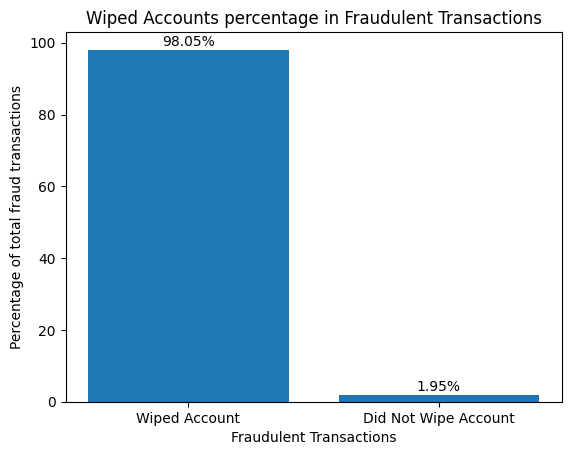

In [9]:
fraud_data = filtered_data[filtered_data['isFraud'] == 1]
fraud_data.to_csv('fraud_data.csv') # I generated a csv file for this so I could manually check the data myself
total_fraud = len(fraud_data)
fraud_wiped = fraud_data[fraud_data['newbalanceOrig'] == 0]
fraud_wiped_count = len(fraud_wiped)
fraud_not_wiped_count = total_fraud - fraud_wiped_count
fraud_wiped_percentage = (fraud_wiped_count / total_fraud) * 100
fraud_not_wiped_percentage = (fraud_not_wiped_count / total_fraud) * 100

labels = ['Wiped Account', 'Did Not Wipe Account']
percentages = [fraud_wiped_percentage, fraud_not_wiped_percentage]
plt.bar(labels, percentages)
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Percentage of total fraud transactions')
plt.title('Wiped Accounts percentage in Fraudulent Transactions')

# I got chatGPT to generate the code to add the percentages to the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.show()


I created this bar chart to show how many of the fraudulent transactions were where the account was completely wiped of its amount

In [ ]:
fraud_not_wiped = fraud_data[fraud_data['newbalanceOrig'] != 0]
fraud_not_wiped.to_csv('fraud_not_wiped.csv')

I created a csv file for this so I could manually check the data myself as I wanted to see what was the main reason they were fraudulent if the account wasn't wiped

# What did we learn from this?

From building this model I learned about what goes into classifying a 'fradulent' transaction. The model is mainly looking for transactions where the whole balance has been wiped from the account leaving 0 in the account. As we can see in the chart above this is a huge amount of the detected fraudulent transactions at a massive 98%, I have personally investigated the other set of fraudulent transactions where the account wasn't wiped and they seem to be flagged because they were trying to transfer exactly 10 million from the account which is an oddly specific large amount of money to be transferring out of an account so that is where that suspicion was raised.

# Dataset Setup
There is some steps to setting up this dataset if you wish to run this file as the dataset cannot be published to GitHub due to it being over 100mb. 

1. Download the dataset from this link: https://www.kaggle.com/datasets/kcoder123/fraud-dataset
2. Unzip the dataset and you should see Fraud.csv
3. Move that into the Fraud-Transactions folder
4. Run the Jupyter notebook Fraud-transactions.ipynb

# Data Overview
This dataset was obtained from here (https://www.kaggle.com/datasets/kcoder123/fraud-dataset). This is a kaggle dataset that outlines some details from a bank users account. These details are going to be used to help predict whether or not a transaction from a users account is a fraudulent transaction or not. I chose this dataset as I thought it would be an interseting dataset to use as I wanted to see what factors would be key in predicting fraudulent transactions and it could be useful for users to see if they think there is a fraudulent transaction on their account

# Pre Processing
There was some pre-processing for this dataset. This is quite a big dataset so I knew that I would have to try and cut a lot of the data from it if it wasnt absolutely necessary. The first thing I did was import it using Pandas and then I began to remove the fields that I didn't think would be useful for making a prediction. For this I chose to remove step as it is just a time period which I didn;t feel had any predictive qualities and then I also removed the account ID that the transaction was going to and from as these are just identifiers and for this model don't provide any use for predictions. Then I split the remaining data into an 80% training block and left another 20% to test the model once it was trained.

# Data Understanding
I feel like I now have a good understanding of my dataset as I have done a lot of pre-proccesing on the data. I also did some research into transactions and what each of the headings fully meant as it was an area that I didn't have too much knowledge in before. The values that ended up having an effect on the prediction the most were the value that was being transferred, the account balance before and the account balance after. This makes sense as if an account is being completely or mostly drained it is most likely going to be a fraudulent transaction but it was interesting to find out this information as I wasn't sure what would've been necessary beforehand.

# Algorithm
For this model I implemented a random forest model using Sci-Kit Learn's random forest model, I used this model as its a binary result for my data and random forests work well for binary classification. This model has a 99% accuracy rating which for any model is a very good rating. I orignally had a 100% rating but this indicated to me that the model was overfitting to the data so I had to add a set amount of classifiers and class weight, this helped as the dataset is a vast majority of non fraudulent transactions so adding this allowed the model not to predict every value as not being fraudulent due to the sheer amount of them it was trained on.

# Technologies Used
I used a few different technologies whilst creating this model such as Pandas which allowed me to read in my dataset and then I used a few of Sci-Kit Learn's tools to build my random forest model such as their accuracy score and their train and test split and their random forest model.
